<a href="https://colab.research.google.com/github/JRCon1/Cap-Size-Based-Optimization-/blob/main/Small%2C_Mid%2C_and_Large_Cap_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
#Package Install / Downloads
!pip install empyrial
!pip install quantstats
!pip install Riskfolio-Lib

import riskfolio as rp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime as dt
import quantstats as qs
from math import pi
from empyrial import empyrial, Engine

pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [ ]:
#Read in Data, filter out any stocks apart from small caps, and Remove all Percentage signs in data
df = pd.read_csv('/content/Stock Data 7-10 CSV.csv')
df.set_index('Symbol', inplace=True)

df = df[df['MC Group'] == 'Small-Cap']

for col in df.columns:
    if df[col].dtype == object and df[col].str.contains('%').any():
        df[col] = df[col].str.replace('%', '').astype(float)


df = df[df['CAGR 10Y'] > 7]
df = df[df['FCF Yield'] > 0.5]
df = df[df['Rev. Growth 5Y'] > 5]
df = df[df['Net Income'] > 0]
df = df[df['EPS'] > 0]
df = df[df['Avg. Volume'] > 20000]
df = df[df['PE Ratio'] > 4]
df = df[df['EPS Growth 5Y'] > 1]
df = df[df['Shares Ch. (YoY)'] > 0]

#Filter Portion Depending on what you want to pull from data
start = dt.date(2019, 8, 20)
tickers = list(df.index)
tickers = [str(ticker) for ticker in tickers if isinstance(ticker, str)]

#Data Pull: This is seemingly the most effective and allows you to run errors while still executing
data = pd.DataFrame()
for ticker in tickers:
    try:
        data[ticker] = yf.download(ticker, start=start)['Adj Close']
    except Exception as e:
        print(f"Could not download data for {ticker}: {e}")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
#Calculate Stock Returns and Benchmark
returns = data.pct_change()
returns = returns.iloc[1:,:]

benchmark = yf.download('SPY', start=start)['Adj Close'].pct_change().dropna()

port = rp.Portfolio(returns=returns)

# Define the optimization model
method_mu = 'hist'
method_cov = 'hist'
hist = True
model = 'Classic'
rm = 'MV'
obj = 'Sharpe'
rf = 0.0
l = 0.00
u = 0.05

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

#Set Asset Limit
card = 20  # Limit to 20 assets

# Optimize portfolio
w = port.optimization(model=model, rm=rm, obj=obj, hist=True, l=l)
w2 = round(w * 100, 2)
w2.sort_values(by = 'weights', ascending=False)
w2 = w2[w2['weights'] > 0]
w2

[*********************100%***********************]  1 of 1 completed


,weights
NSSC,5.5900
LMAT,5.4000
AMPH,5.2300
POWL,7.7600
DMLP,18.4300
TRNS,14.5600
XPEL,10.4300
HCI,6.2500
TIPT,0.5700
NBN,0.0100


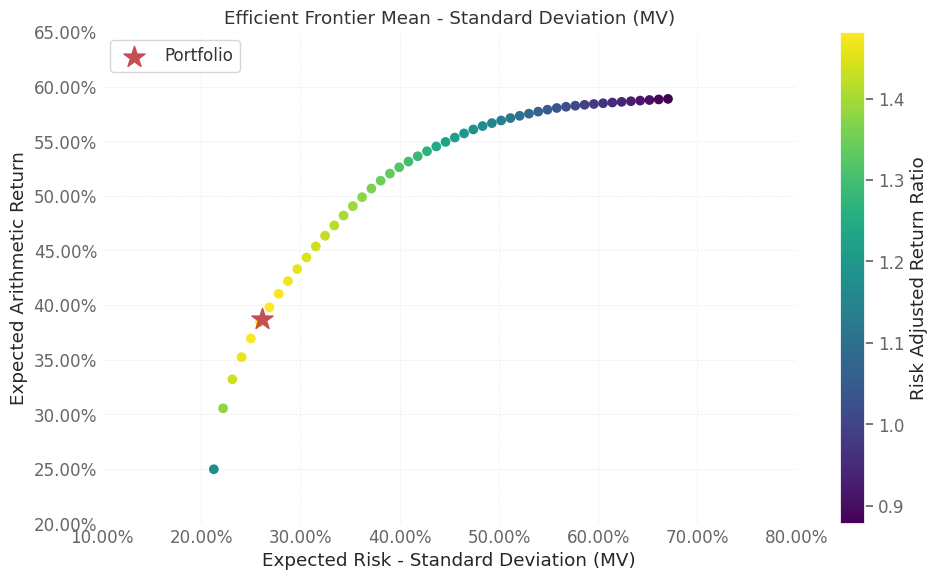

In [ ]:
frontier = port.efficient_frontier(model=model, rm=rm, points=50, hist=hist)
ax = rp.plot_frontier(w_frontier=frontier, mu = port.mu, cov = port.cov, returns = returns, rm=rm, w=w)
plt.show()

## Mid-Cap Section

In [ ]:
df2 = pd.read_csv('/content/Stock Data 7-10 CSV.csv')

df2 = df2[df2['MC Group'] == 'Mid-Cap']

for col in df2.columns:
    if df2[col].dtype == object and df2[col].str.contains('%').any():
        df2[col] = df2[col].str.replace('%', '').astype(float)

#Set Filters for Mid-Caps
df2= df2[df2['CAGR 10Y'] > 7]
df2 = df2[df2['FCF Yield'] > 1]
df2 = df2[df2['FCF Growth 5Y'] > 5]
df2 = df2[df2['Net Income'] > 0]
df2 = df2[df2['EPS'] > 0]
df2 = df2[df2['EPS Growth 5Y'] > 1]
df2 = df2[df2['Avg. Volume'] > 20000]

df2.set_index('Symbol', inplace=True)
tickers2 = list(df2.index)
tickers2 = [str(ticker).replace('.', '-') for ticker in tickers2]

data2 = pd.DataFrame()
for ticker in tickers2:
    try:
        data2[ticker] = yf.download(ticker, start=start)['Adj Close']
    except Exception as e:
        print(f"Could not download data for {ticker}: {e}")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
returns2 = data2.pct_change().iloc[1:]
port2 = rp.Portfolio(returns=returns2)

port2.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Optimize portfolio
w3 = port2.optimization(model=model, rm=rm, obj=obj, hist=True, l=l)

w4 = round(w3 * 100, 2)
w4.sort_values(by = 'weights', ascending=False)
w4 = w4[w4['weights'] > 0]
w4

,weights
STN,13.5500
MUSA,16.7600
ANF,3.6300
SFM,17.4700
NVMI,7.9100
MOD,3.5000
FIZZ,3.0400
STRL,5.5000
CALM,3.0700
IESC,5.8000


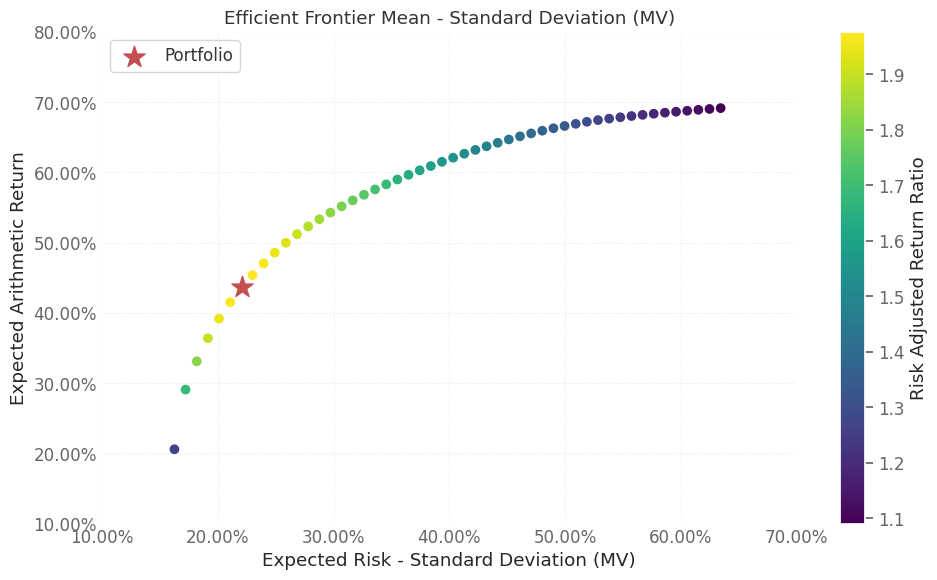

In [ ]:
frontier = port2.efficient_frontier(model=model, rm=rm, points=50, hist=hist)
ax = rp.plot_frontier(w_frontier=frontier, mu = port2.mu, cov = port2.cov, returns = returns2, rm=rm, w=w3)
plt.show()

In [ ]:
df3 = pd.read_csv('/content/Stock Data 7-10 CSV.csv')
df3.set_index('Symbol', inplace=True)
df3 = df3[df3['MC Group'] == 'Large-Cap']

for col in df3.columns:
    if df3[col].dtype == object and df3[col].str.contains('%').any():
        df3[col] = df3[col].str.replace('%', '').replace('NaN.00', np.nan).astype(float)
df3 = df3[df3['CAGR 10Y'] > 10]
df3 = df3[df3['FCF Yield'] > 2]
df3 = df3[df3['FCF Growth 5Y'] > 7]
df3 = df3[df3['Net Income'] > 0]
df3 = df3[df3['EPS'] > 0]
df3 = df3[df3['EPS Growth 5Y'] > 3]
df3 = df3[df3['ROIC (5Y)'] > 12]
df3 = df3[df3['Avg. Volume'] > 20000]


tickers3 = list(df3.index)
tickers3 = [str(ticker).replace('.', '-') for ticker in tickers3]

data3 = pd.DataFrame()
for ticker in tickers3:
    try:
        data3[ticker] = yf.download(ticker, start=start)['Adj Close']
    except Exception as e:
        print(f"Could not download data for {ticker}: {e}")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
returns3 = data3.pct_change().iloc[1:]
port3 = rp.Portfolio(returns=returns3)

port3.assets_stats(method_mu=method_mu, method_cov=method_cov)

w5 = port3.optimization(model=model, rm=rm, obj=obj, hist=True, l=l)
w6 = round(w5 * 100, 2)
w6.sort_values(by = 'weights', ascending=False)
w6 = w6[w6['weights'] > 0]
w6

,weights
PGR,22.5000
REGN,26.5700
SCCO,0.4900
NTES,0.6900
FTNT,5.5200
DECK,4.8000
WSO,1.4000
TPL,4.9600
BLDR,1.5100
DPZ,0.2800


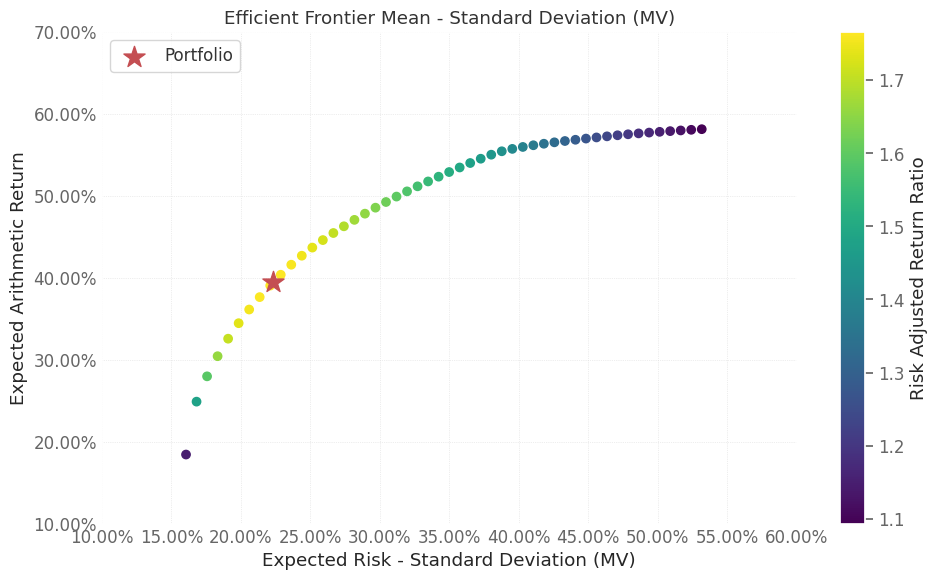

In [ ]:
frontier = port3.efficient_frontier(model=model, rm=rm, points=50, hist=hist)
ax = rp.plot_frontier(w_frontier=frontier, mu = port3.mu, cov = port3.cov, returns = returns3, rm=rm, w=w5)
plt.show()

In [ ]:
optimalTickers = (w2 + w4 + w6).index.tolist()
len(optimalTickers)

39

In [ ]:
optReturns = yf.download(optimalTickers, start=start)['Adj Close'].pct_change().iloc[1:]
port4 = rp.Portfolio(returns=optReturns)

port4.assets_stats(method_mu=method_mu, method_cov=method_cov)

w7 = port4.optimization(model=model, rm=rm, obj=obj, hist=True, l=l)
w8 = round(w7 * 100, 2)
w8.sort_values(by = 'weights', ascending=False)
w8 = w8[w8['weights'] > 0]
w8

[*********************100%***********************]  39 of 39 completed


,weights
ANF,2.4100
AVNW,2.0600
CALM,0.6600
DKS,2.2600
DMLP,2.8900
FIZZ,1.6400
FTNT,2.2900
IESC,3.8000
LRN,4.8700
MOD,3.2700


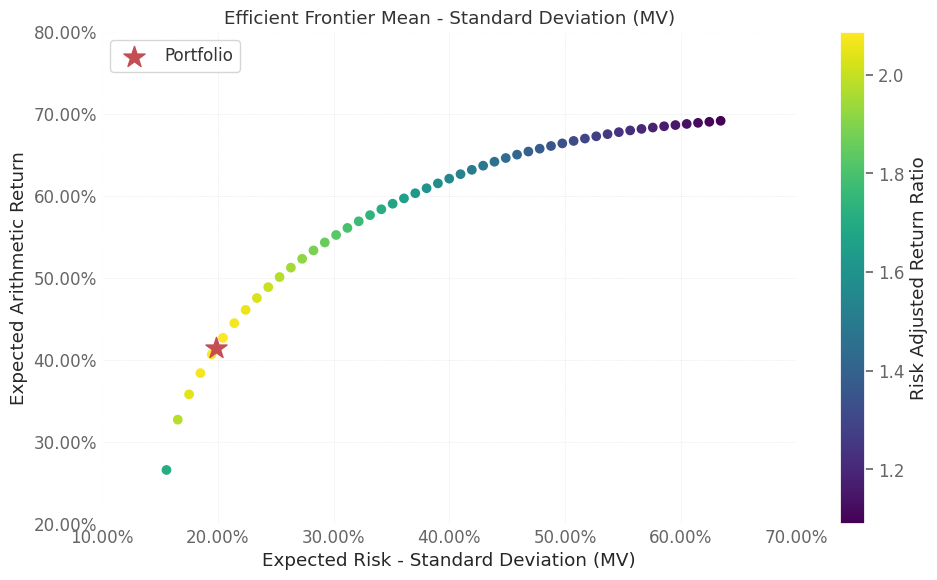

In [ ]:
frontier = port4.efficient_frontier(model=model, rm=rm, points=50, hist=hist)
ax = rp.plot_frontier(w_frontier=frontier, mu = port4.mu, cov = port4.cov, returns = optReturns, rm=rm, w=w7)
plt.show()

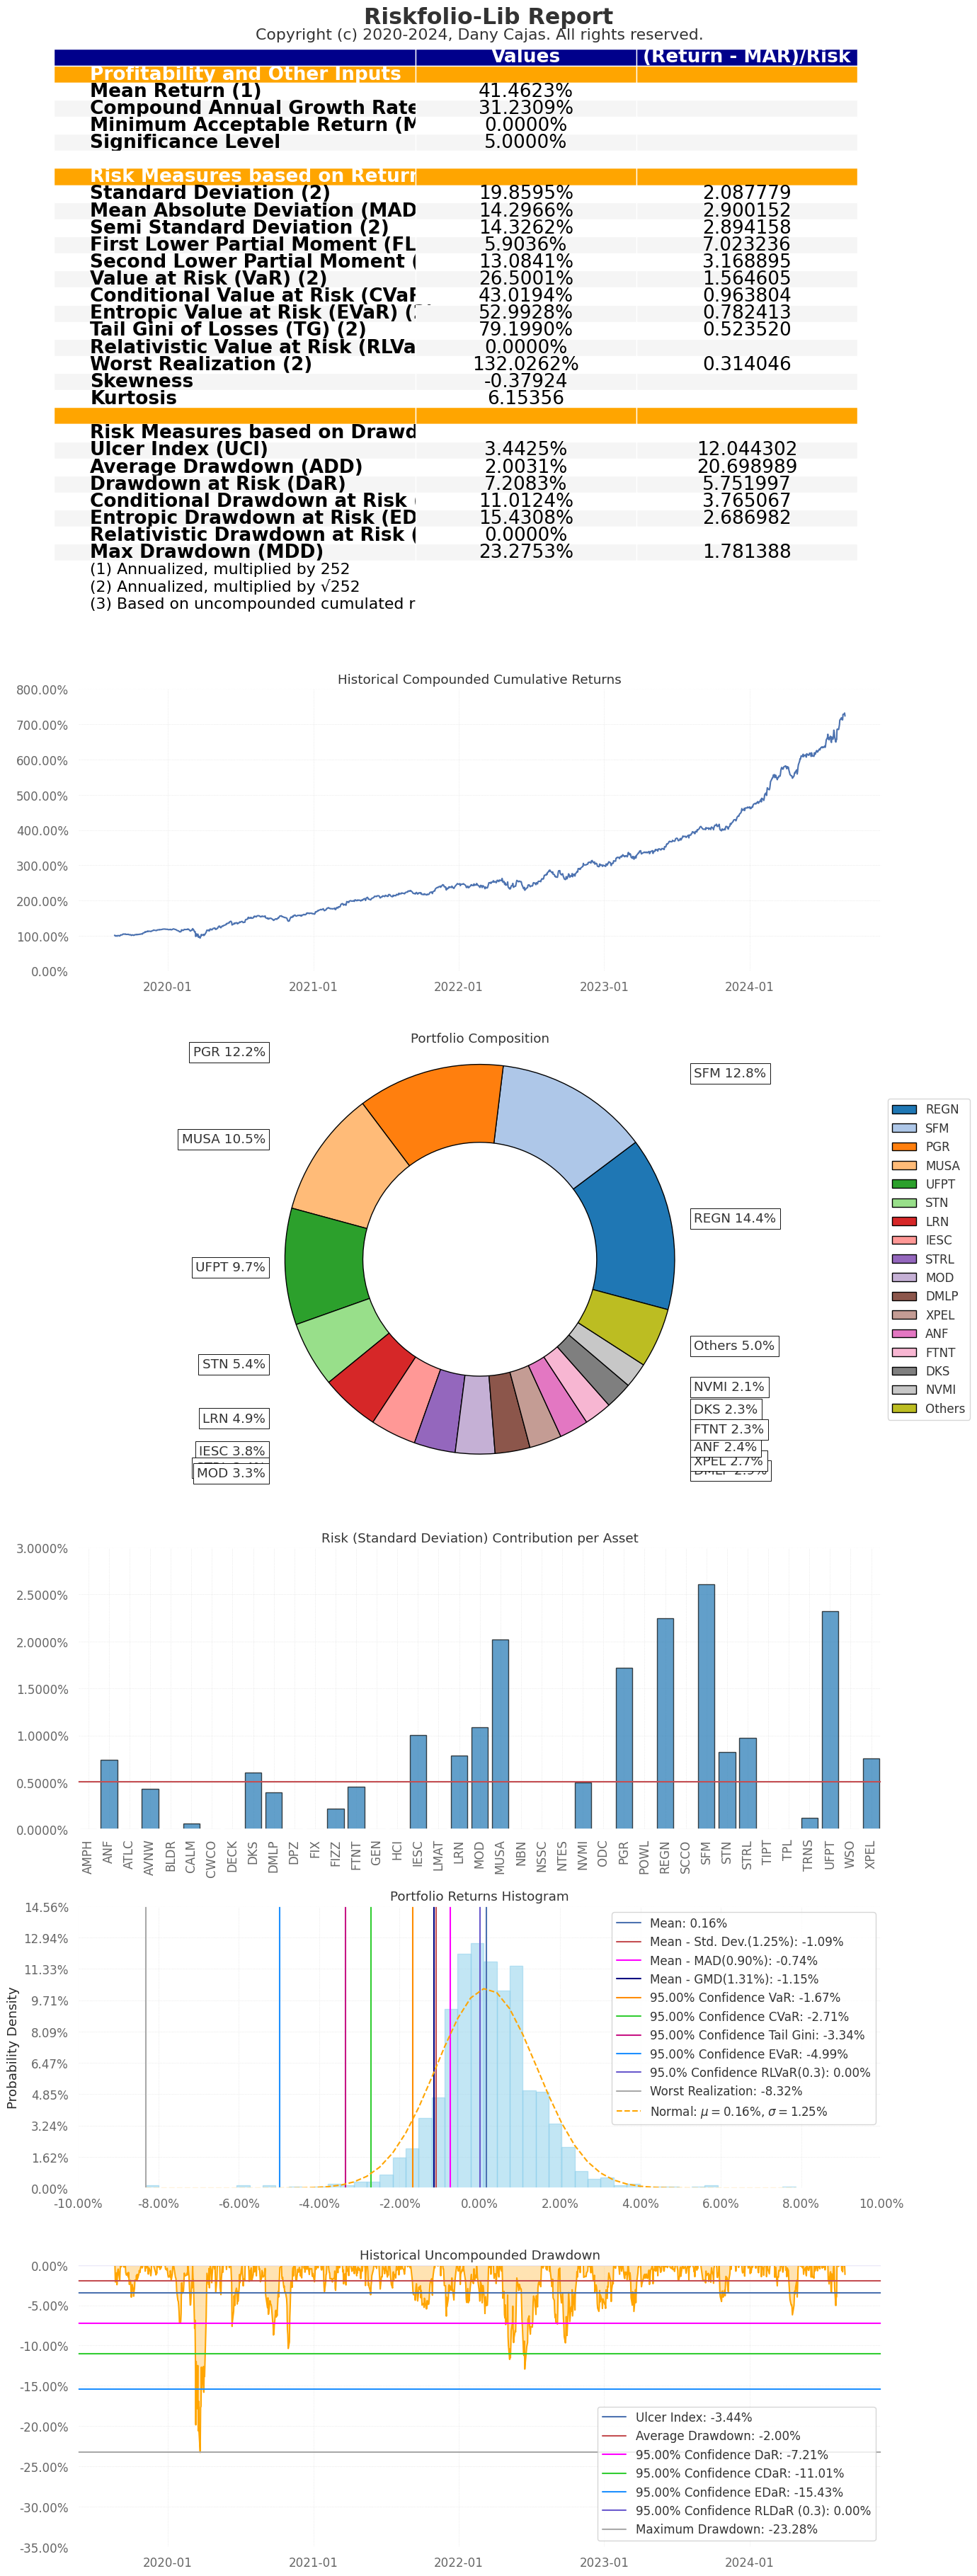

In [ ]:
ax = rp.jupyter_report(optReturns, w7, rm=rm)
plt.show()

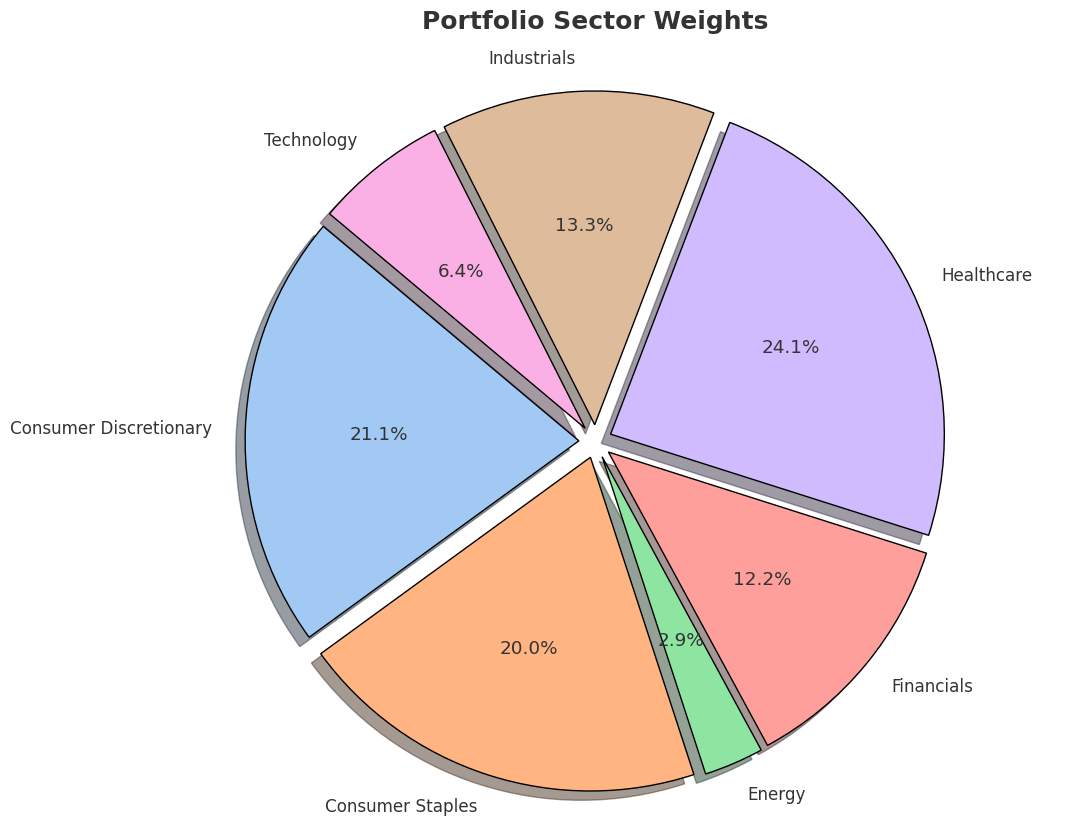

In [ ]:
df4 = pd.read_csv('/content/Stock Data 7-10 CSV.csv')
df4 = df4[df4['Symbol'].isin(w8.index)].set_index('Symbol')
df4 = pd.concat([df4, w8], axis=1)
sector_weights = df4.groupby('Sector')['weights'].sum()
colors = sns.color_palette('pastel', len(sector_weights))

plt.figure(figsize=(12, 10))
plt.pie(
    x=sector_weights,
    labels=sector_weights.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black'},
    shadow=True,
    explode=[0.05]*len(sector_weights)
)

plt.title('Portfolio Sector Weights', fontsize=18, weight='bold', pad=20)
plt.axis('equal')
plt.show()

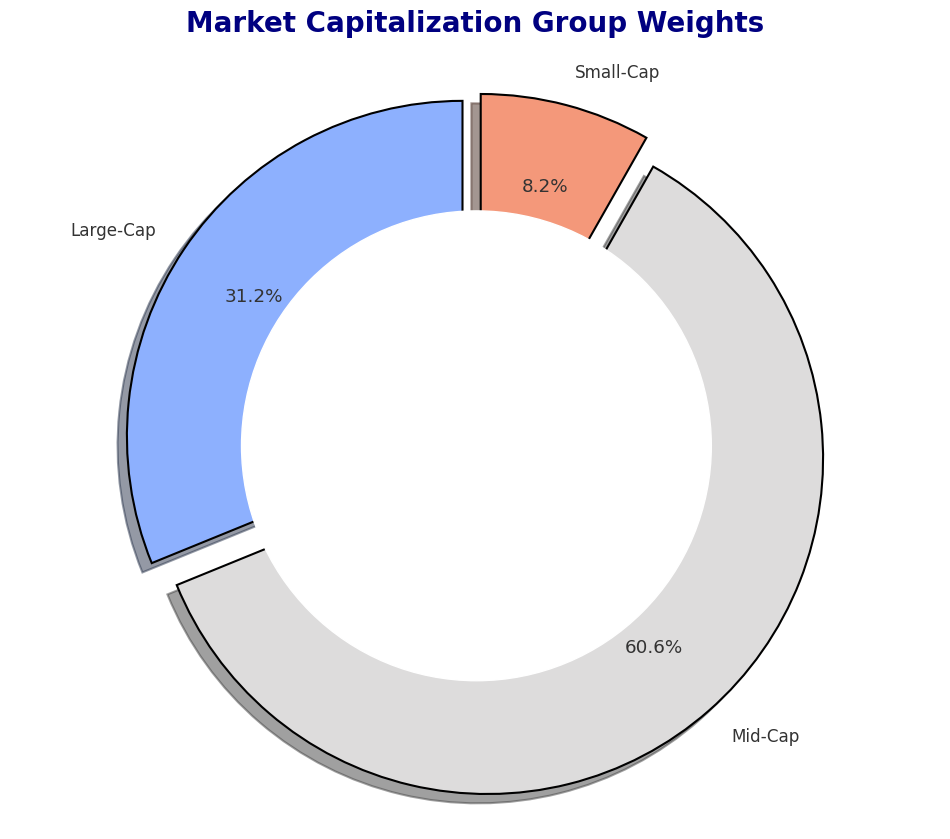

In [ ]:
MCGroup_weights = df4.groupby('MC Group')['weights'].sum()
colors = sns.color_palette('coolwarm', len(MCGroup_weights))
plt.figure(figsize=(12, 10))

plt.pie(
    x=MCGroup_weights,
    labels=MCGroup_weights.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},
    shadow=True,
    explode=[0.05]*len(MCGroup_weights),
    pctdistance=0.75,
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Market Capitalization Group Weights', fontsize=20, weight='bold', color='navy', pad=20)
plt.axis('equal')
plt.show()

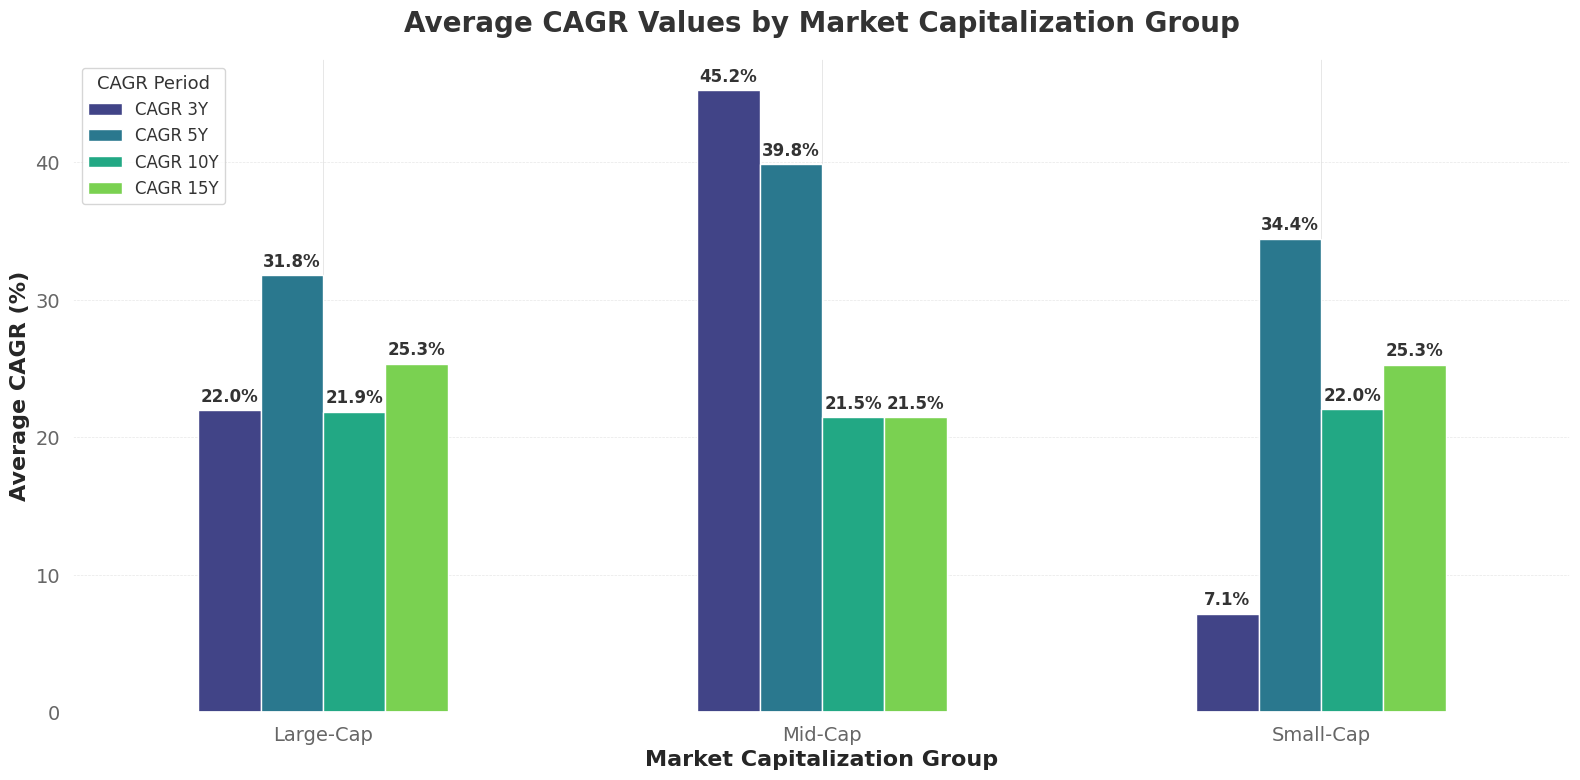

In [ ]:
CAGRS = df4[['CAGR 3Y', 'CAGR 5Y', 'CAGR 10Y', 'CAGR 15Y']].apply(lambda x: x.str.strip('%')).astype(float)
CAGRS['MC Group'] = df4['MC Group']
CAGRS = CAGRS.groupby('MC Group').mean()

# Define a color palette for variety in the bars
colors = sns.color_palette('viridis', len(CAGRS.columns))
ax = CAGRS.plot(kind='bar', figsize=(16, 8), color=colors)
plt.title('Average CAGR Values by Market Capitalization Group', fontsize=20, weight='bold', pad=20)
plt.xlabel('Market Capitalization Group', fontsize=16, weight='bold')
plt.ylabel('Average CAGR (%)', fontsize=16, weight='bold')
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=12, fontweight='bold')

plt.legend(title='CAGR Period', title_fontsize='13', fontsize='12', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

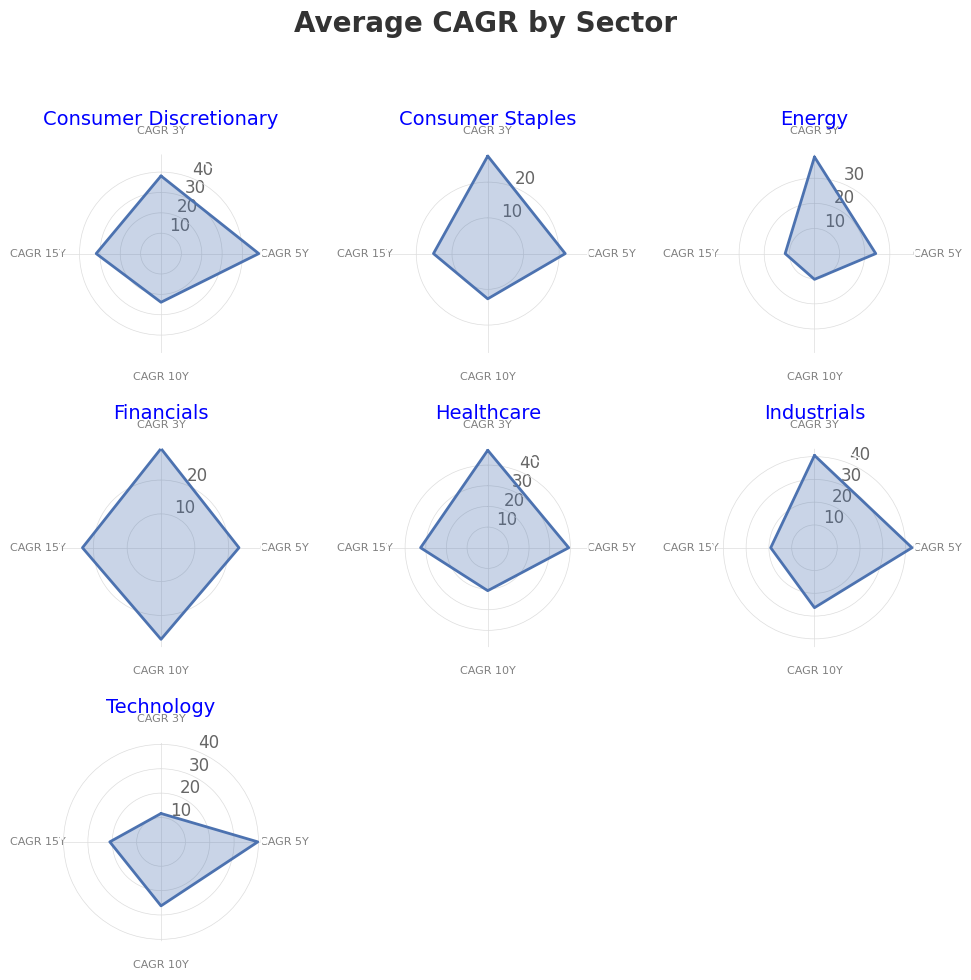

In [ ]:
CAGRS = df4[['CAGR 3Y', 'CAGR 5Y', 'CAGR 10Y', 'CAGR 15Y']].apply(lambda x: x.str.strip('%')).astype(float)
CAGRS['Sector'] = df4['Sector']
CAGRS2 = CAGRS.groupby('Sector').mean()
CAGRS2

categories = list(CAGRS2.columns)
N = len(categories)
plt.figure(figsize=(10, 10))
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Plot each sector
for i, sector in enumerate(CAGRS2.index):
    values = CAGRS2.loc[sector].values.flatten().tolist()
    values += values[:1]
    ax = plt.subplot(3, 3, i + 1, polar=True)
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=sector)
    ax.fill(angles, values, alpha=0.3)

    plt.title(sector, size=14, color='blue', y=1.1)

plt.suptitle('Average CAGR by Sector', fontsize=20, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

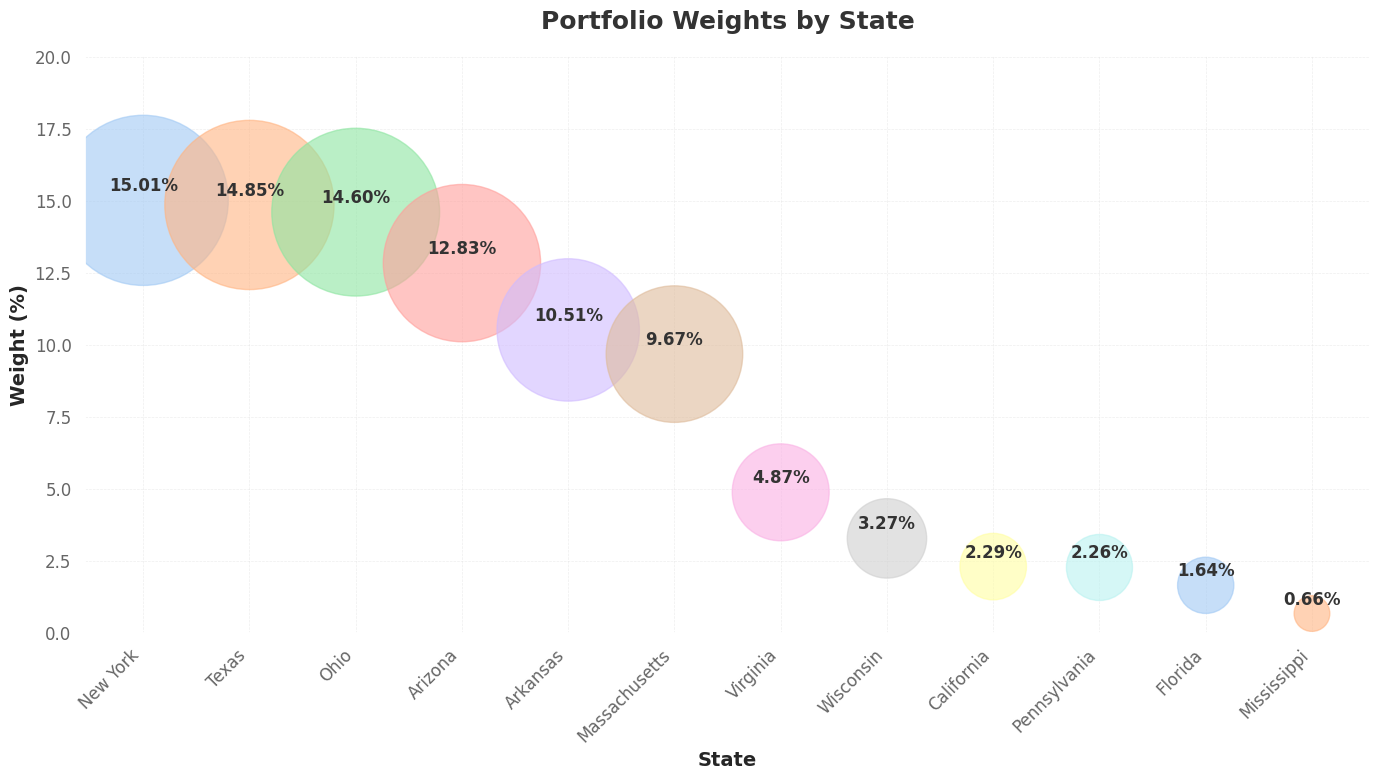

In [ ]:
state_weights = df4.groupby('State')['weights'].sum()
state_weights = state_weights.sort_values(ascending=False)
plt.figure(figsize=(14, 8))
plt.scatter(
    x=state_weights.index,
    y=state_weights,
    s=state_weights * 1000,
    alpha=0.6,
    color=sns.color_palette('pastel', len(state_weights))
)

for i, state in enumerate(state_weights.index):
    plt.text(state, state_weights[i] + 0.5, f'{state_weights[i]:.2f}%',
             ha='center', va='center', fontsize=12, weight='bold')

plt.title('Portfolio Weights by State', fontsize=18, weight='bold', pad=20)
plt.xlabel('State', fontsize=14, weight='bold')
plt.ylabel('Weight (%)', fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, state_weights.max() + 5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
ticks = w7.index.tolist()

port_rets = optReturns[ticks].dot(w7['weights'])
qs.reports.metrics(port_rets, benchmark)

                    Benchmark    Strategy
------------------  -----------  ----------
Start Period        2019-08-21   2019-08-21
End Period          2024-08-28   2024-08-28
Risk-Free Rate      0.0%         0.0%
Time in Market      100.0%       100.0%

Cumulative Return   108.23%      623.62%
CAGR﹪              10.6%        31.25%

Sharpe              0.81         2.09
Prob. Sharpe Ratio  96.19%       100.0%
Sortino             1.13         3.17
Sortino/√2          0.8          2.24
Omega               1.44         1.44

Max Drawdown        -33.72%      -22.19%
Longest DD Days     708          104

Gain/Pain Ratio     0.17         0.44
Gain/Pain (1M)      0.94         4.36

Payoff Ratio        0.9          1.1
Profit Factor       1.17         1.44
Common Sense Ratio  1.13         1.75
CPC Index           0.58         0.88
Tail Ratio          0.97         1.21
Outlier Win Ratio   3.7          3.25
Outlier Loss Ratio  3.77         4.03

MTD                 1.36%        5.88%
3M          